<a href="https://colab.research.google.com/github/Karthik-HU-Karthi/first-repo/blob/main/Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Employee Attrition Prediction

This project predicts whether an employee is likely to leave a company using machine learning. It includes:

- Custom synthetic dataset generation
- EDA and visualization
- Preprocessing and encoding
- Logistic Regression & Random Forest models
- Hyperparameter tuning
- Model evaluation and saving

## Dataset
A synthetic dataset with 1000 records and 14 features including age, gender, department, job satisfaction, income, etc.

## How to Run

1. Install dependencies: `pip install -r requirements.txt`
2. Open and run `attrition_prediction.ipynb`
3. Model is saved as `attrition_model.pkl`


 ### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib


 ### Generate Synthetic Dataset

In [ ]:
def generate_attrition_data(n=1000):
    data = {
        "Age": np.random.randint(22, 60, size=n),
        "Gender": np.random.choice(["Male", "Female"], size=n),
        "Department": np.random.choice(["Sales", "IT", "HR", "R&D", "Finance"], size=n),
        "JobRole": np.random.choice(["Manager", "Executive", "Engineer", "Analyst", "Clerk"], size=n),
        "MonthlyIncome": np.random.randint(3000, 25000, size=n),
        "JobSatisfaction": np.random.randint(1, 5, size=n),
        "OverTime": np.random.choice(["Yes", "No"], size=n, p=[0.3, 0.7]),
        "YearsAtCompany": np.random.randint(0, 40, size=n),
        "DistanceFromHome": np.random.randint(1, 50, size=n),
        "Education": np.random.randint(1, 6, size=n),
        "WorkLifeBalance": np.random.randint(1, 5, size=n),
        "EnvironmentSatisfaction": np.random.randint(1, 5, size=n),
        "PerformanceRating": np.random.randint(1, 5, size=n),
    }

    df = pd.DataFrame(data)
    df["Attrition"] = df.apply(lambda row:
        "Yes" if row["OverTime"] == "Yes" and row["JobSatisfaction"] <= 2 and row["YearsAtCompany"] < 3 else "No", axis=1)
    return df

df = generate_attrition_data()
df.to_csv("synthetic_employee_attrition.csv", index=False)
df.head()


,Age,Gender,Department,JobRole,MonthlyIncome,JobSatisfaction,OverTime,YearsAtCompany,DistanceFromHome,Education,WorkLifeBalance,EnvironmentSatisfaction,PerformanceRating,Attrition
0,58,Female,Sales,Executive,21674,3,No,5,43,4,3,4,4,No
1,25,Male,Sales,Analyst,7825,1,Yes,22,16,4,2,3,2,No
2,50,Male,Finance,Executive,17143,3,Yes,37,15,3,1,1,4,No
3,49,Male,Sales,Analyst,19907,4,Yes,23,26,1,4,2,1,No
4,53,Female,HR,Executive,20010,2,No,31,35,1,3,1,1,No


### Exploratory Data Analysis (EDA)

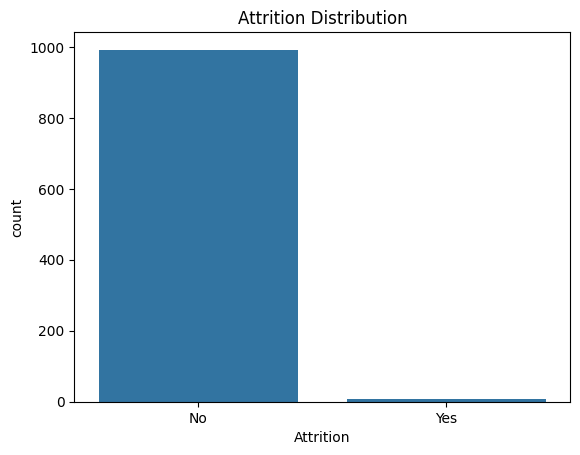

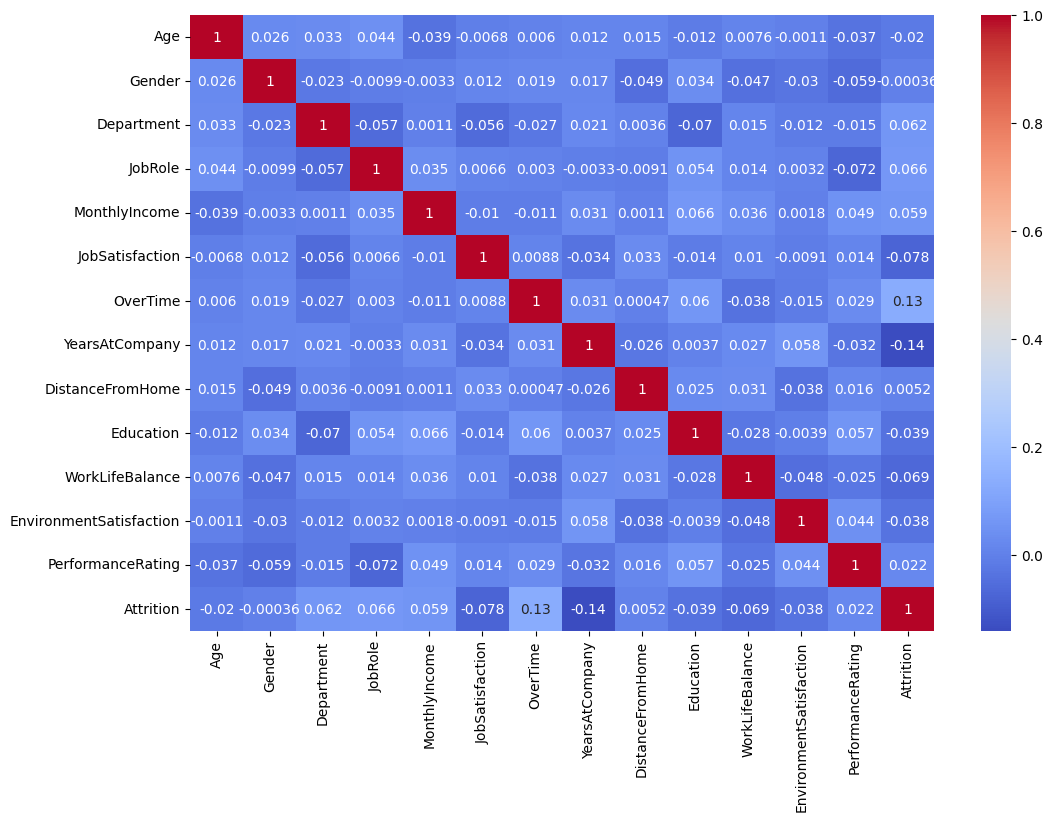

In [ ]:
# Check class balance
sns.countplot(data=df, x='Attrition')
plt.title("Attrition Distribution")
plt.show()

# Correlation heatmap (after encoding)
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()


### Preprocess the Data

In [ ]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
categorical_cols = df.select_dtypes(include='object').columns

le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Train & Evaluate Models

#### Logistic Regression

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
u

Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00         2

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



#### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       198
           1       0.00      0.00      0.00         2

    accuracy                           0.99       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.98      0.99      0.99       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###Hyperparameter Tuning (Random Forest)

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best))


Tuned Random Forest Accuracy: 0.99


### Save the Final Model

In [ ]:
joblib.dump(best_rf, 'attrition_model.pkl')


['attrition_model.pkl']